<a href="https://colab.research.google.com/github/Avinashpv87/cs666student/blob/main/CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

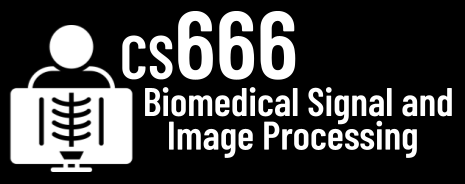
#Assignment 5

In [ ]:
# NAME: Avinash Pamidimukkala

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [ ]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.6 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [1]:
#YOUR_ANSWER:220



In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

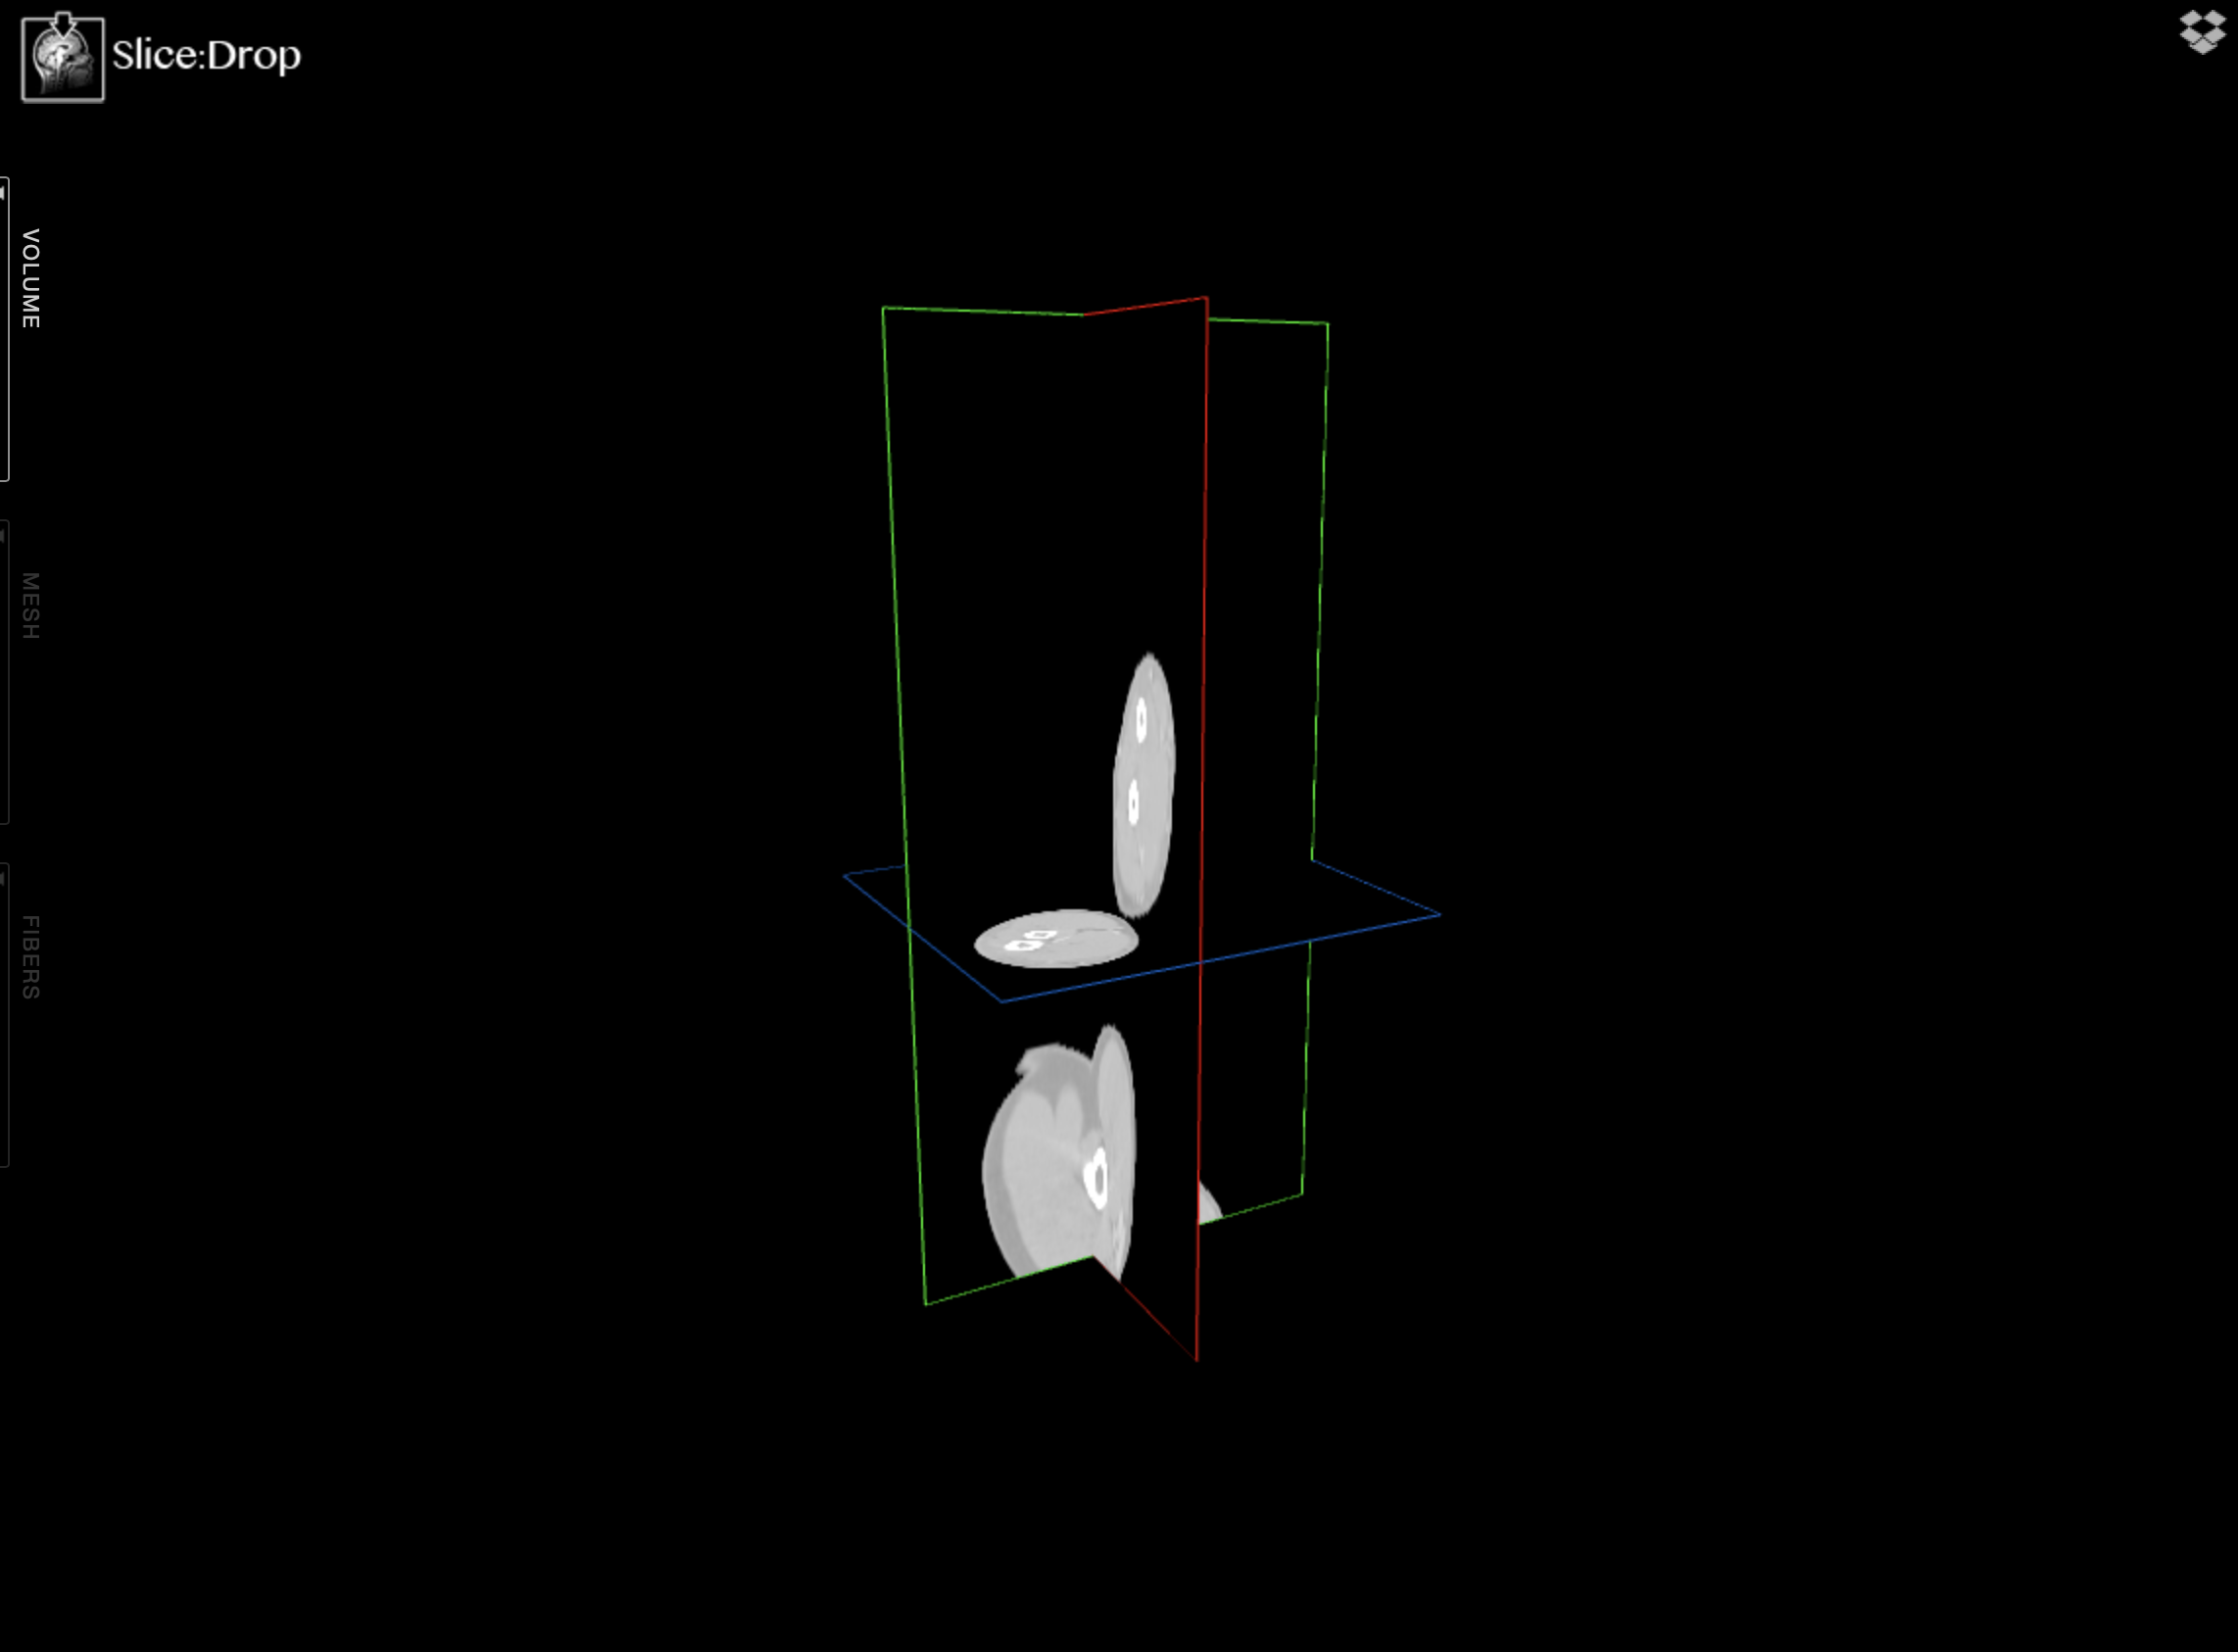

In [ ]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

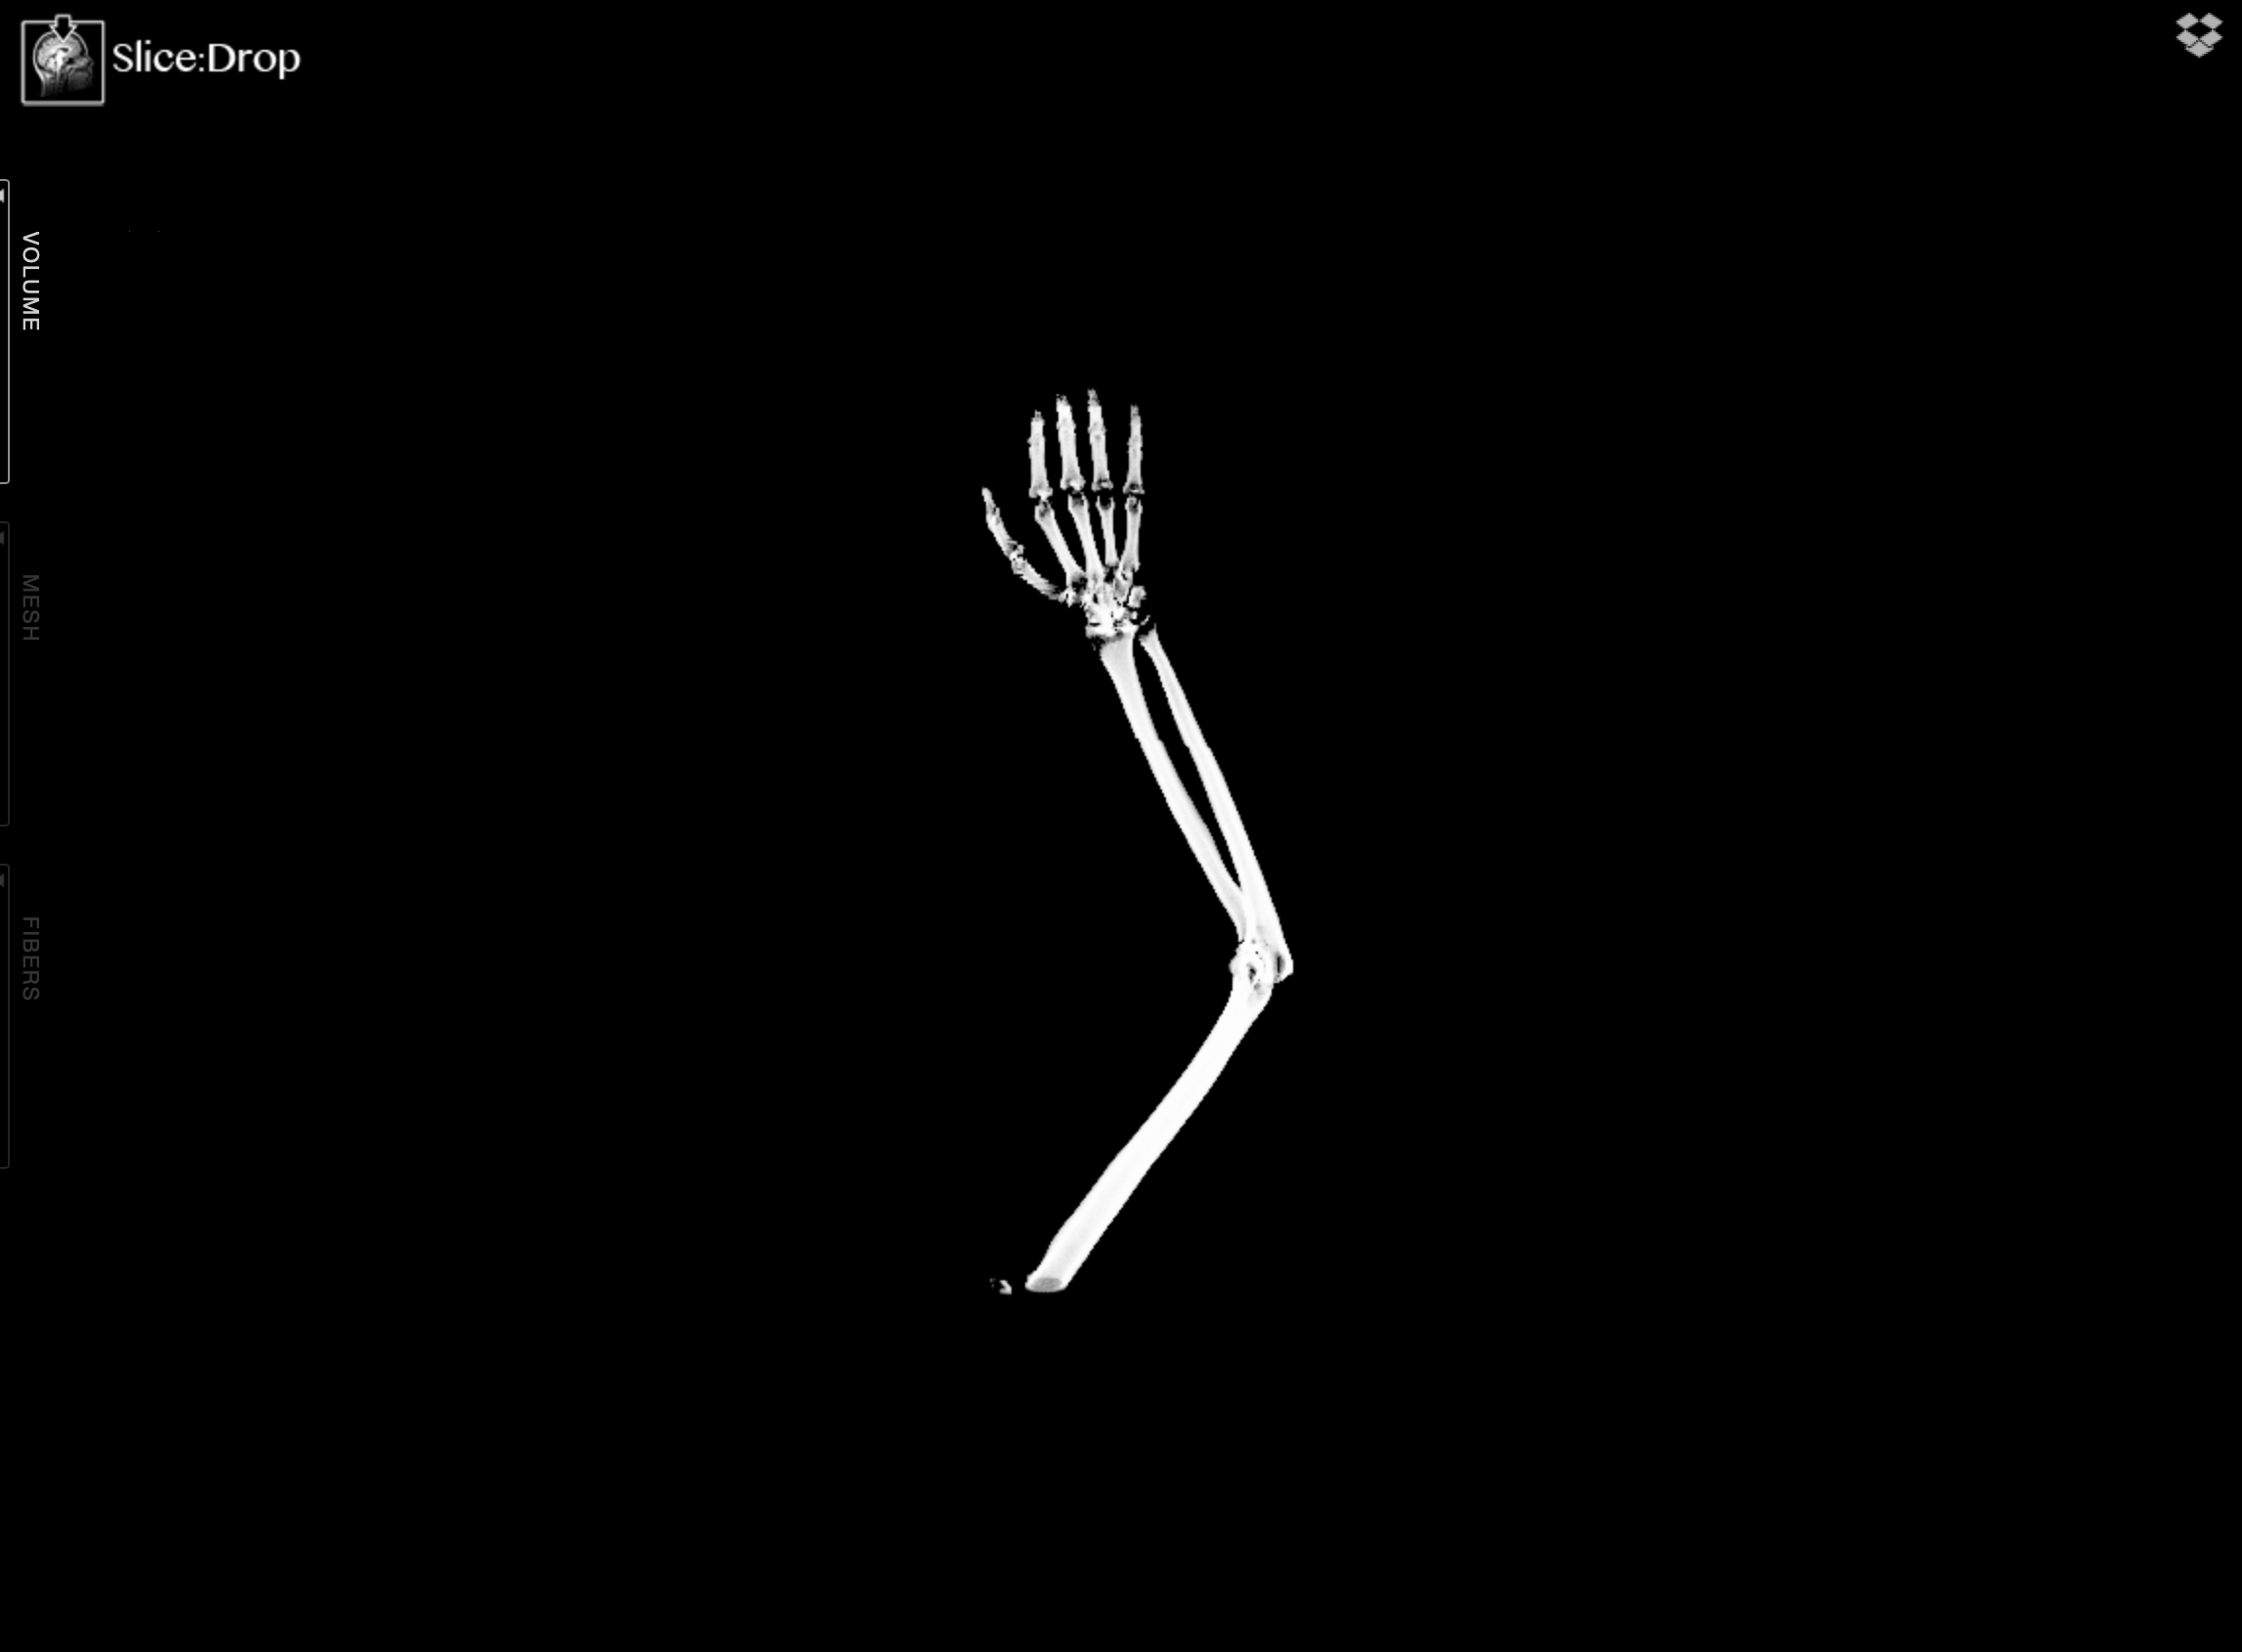

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [2]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [4]:
from pydicom import dcmread

In [8]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import os
import numpy as np
dcm_files = []
file_names = sorted(os.listdir('./ct/'))
dcm = [dcmread(os.path.join('./ct/',file)) for file in file_names]


In [16]:
len(dcm)

220

In [15]:
print("single example",dcm[0].pixel_array)
print("dimensions:", dcm[0].pixel_array.shape)

single example [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
dimensions: (454, 512)


In [25]:
file_array = np.zeros((len(dcm), dcm[0].pixel_array.shape[0], dcm[0].pixel_array.shape[1]), dtype='float32')

In [26]:
for i in range(len(dcm)):
  file_array[i, :,:] = dcm[i].pixel_array

In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

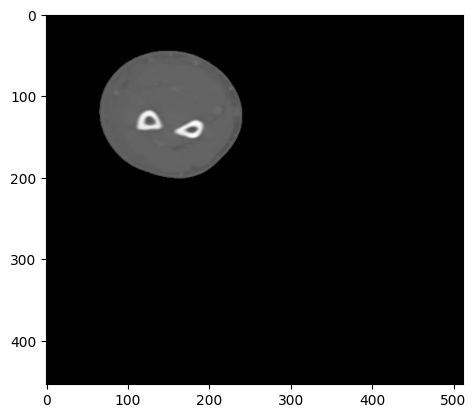

In [29]:
# TODO: YOUR CODE FOR AXIAL
import matplotlib.pyplot as plt
plt.imshow(file_array[int(len(dcm)/2),:,:], cmap='gray')
plt.show()

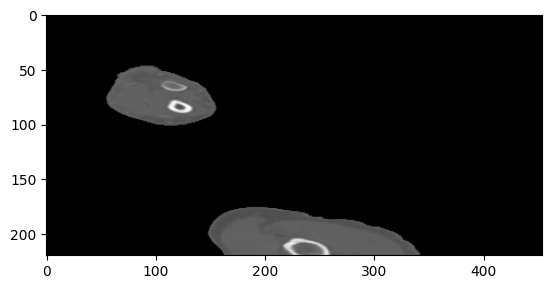

In [68]:
# TODO: YOUR CODE FOR SAGITTAL
plt.imshow(file_array[:,:,int(dcm[0].pixel_array.shape[1]/2)], cmap='gray')
plt.show()

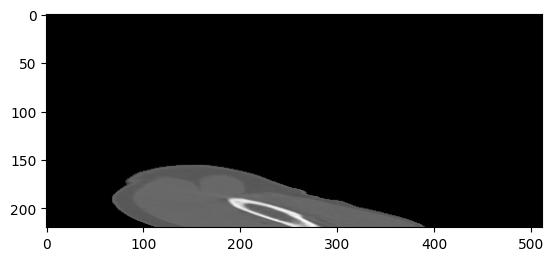

In [69]:
# TODO: YOUR CODE FOR CORONAL
plt.imshow(file_array[:,int(dcm[0].pixel_array.shape[0]/2),:], cmap='gray')
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

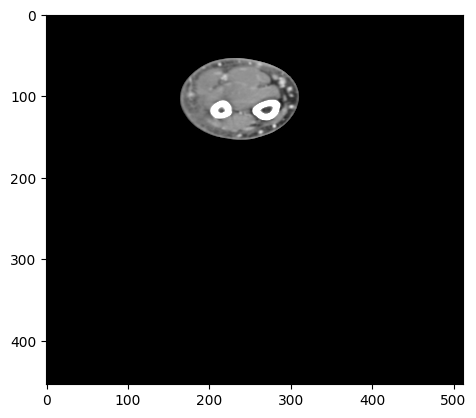

In [43]:
# TODO: YOUR CODE
vmin = dcm[0].WindowCenter - (dcm[0].WindowWidth/2)
vmax = dcm[0].WindowCenter + (dcm[0].WindowWidth/2)
plt.imshow(file_array[int(len(dcm[0])),:,:] + dcm[0]['RescaleIntercept'].value, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

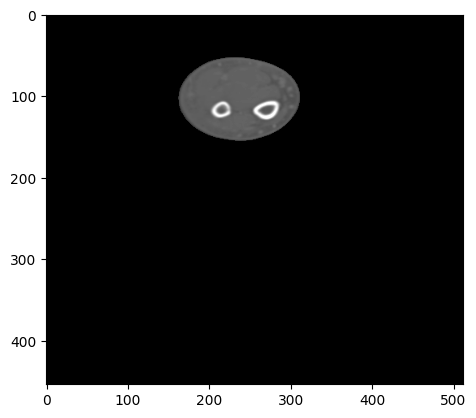

In [45]:
# 2) Play around with different Window/Level values that enhance
# the visualization.
window = 2500
level = 350
vmin = level - window/2
vmax = level + window/2
plt.imshow(file_array[int(len(dcm[0])),:,:] + dcm[0]['RescaleIntercept'].value, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

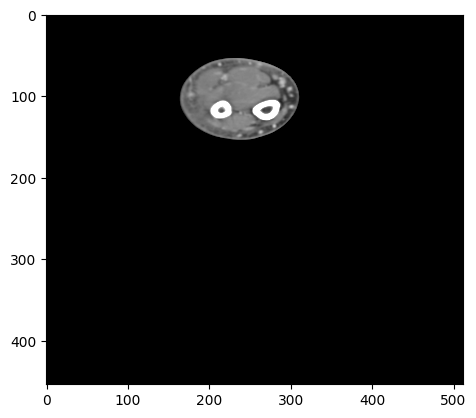

In [46]:
# TODO: YOUR CODE
window = 500
level = 50
vmin = level - window/2
vmax = level + window/2
plt.imshow(file_array[int(len(dcm[0])),:,:] + dcm[0]['RescaleIntercept'].value, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?


In [ ]:
# TODO: YOUR ANSWER

In [ ]:
# greater the window size and level gives more observability of bones and lower the window 
# and level values gives more observability to tissues. 

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

Axial


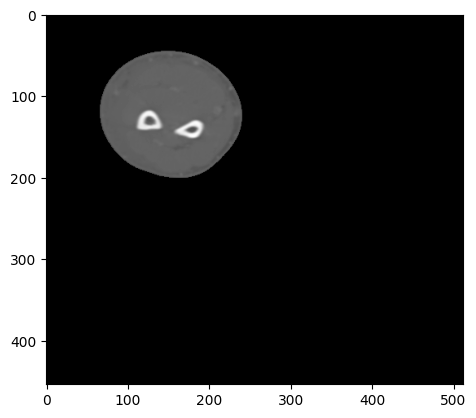

In [112]:
# TODO: YOUR CODE TO SEGMENT FAT
fat_range = (750, 1050)
soft_tissue_range = (900, 1200)
bones_range = (1900,3000)

fat_file = file_array.copy().astype('int16')
fat_file[fat_file < 750] = 0
print("Axial")
plt.imshow(fat_file[int(len(dcm)/2), :,:], cmap='gray')
plt.show()

SEGITTAL


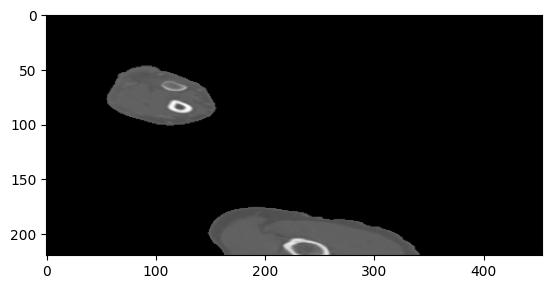

In [113]:
print("SEGITTAL")
plt.imshow(fat_file[:,:,int(dcm[120].pixel_array.shape[1]/2)], cmap='gray')
plt.show()

CORONAL


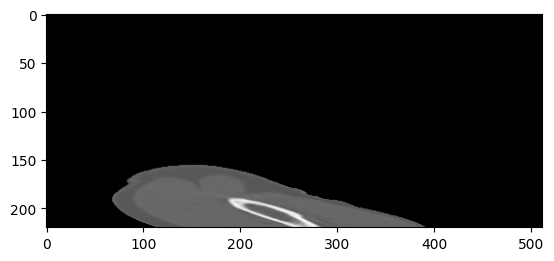

In [114]:
print("CORONAL")
plt.imshow(fat_file[:,int(dcm[120].pixel_array.shape[0]/2),:], cmap='gray')
plt.show()

AXIAL


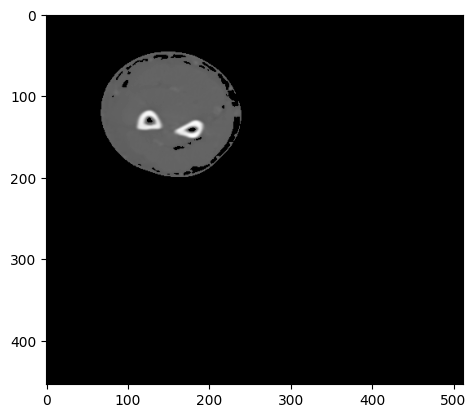

In [115]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
tissue_file = file_array.copy().astype('int16')
tissue_file[tissue_file < 1000] = 0
print("AXIAL")
plt.imshow(tissue_file[int(len(dcm)/2),:,:], cmap='gray')
plt.show()

SEGITTAL


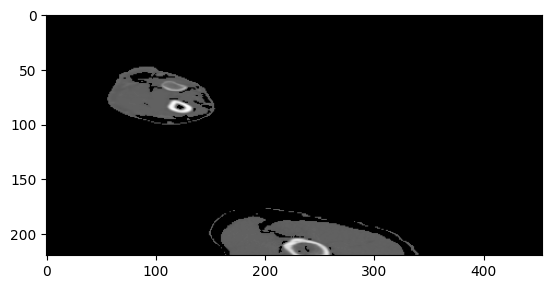

In [119]:
print("SEGITTAL")
plt.imshow(tissue_file[:,:,int(dcm[120].pixel_array.shape[1]/2)], cmap='gray')
plt.show()

CORONAL


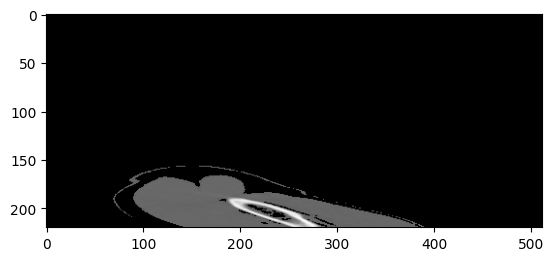

In [118]:
print("CORONAL")
plt.imshow(tissue_file[:,int(dcm[120].pixel_array.shape[0]/2),:], cmap='gray')
plt.show()

AXIAL


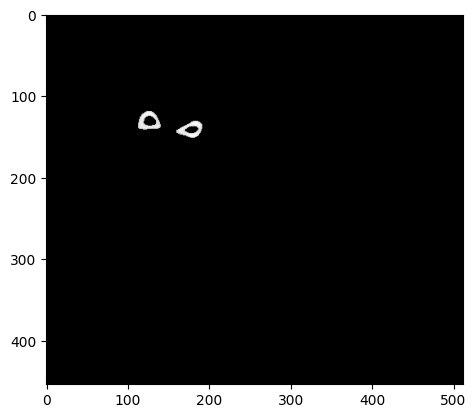

In [121]:
# TODO: YOUR CODE TO SEGMENT BONES
bones_file = file_array.copy().astype('int16')
bones_file[bones_file < 2000] = 0
print("AXIAL")
plt.imshow(bones_file[int(len(dcm)/2),:,:], cmap='gray')
plt.show()

SEGITTAL


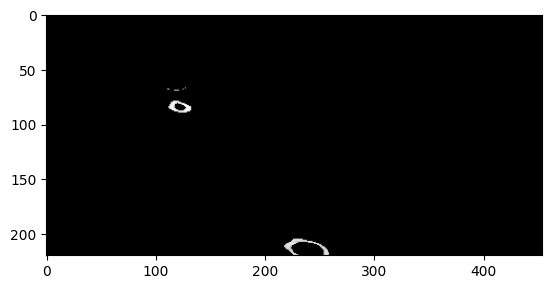

In [122]:
print("SEGITTAL")
plt.imshow(bones_file[:,:,int(dcm[120].pixel_array.shape[1]/2)], cmap='gray')
plt.show()

CORONAL


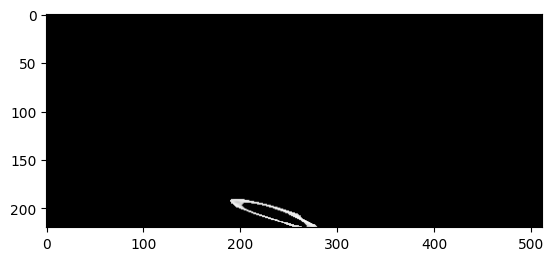

In [123]:
print("CORONAL")
plt.imshow(bones_file[:,int(dcm[120].pixel_array.shape[0]/2),:], cmap='gray')
plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
# yes, the above segmentations looks great for the threshold ranges chosen. 

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""